# Logistic Regression

## Introduction

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
x1 = np.random.normal(0, 1, 50)
x2 = np.random.normal(4, 1, 50)
x = np.concatenate((x1,x2))
y = np.array([0]*50 + [1]*50)

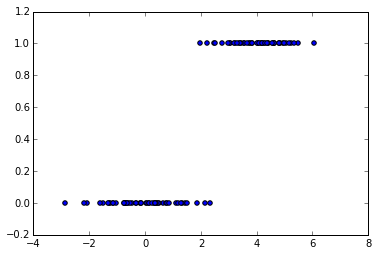

In [30]:
plt.scatter(x,y)

We want to measure the strength of one class or the other.

(-0.5, 1.5)

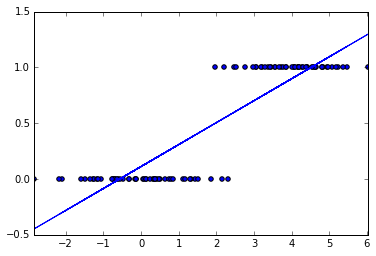

In [31]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(x.reshape(100,1),y)
plt.scatter(x, y)
plt.plot(x,clf.predict(x.reshape(100,1)))

plt.xlim((min(x),max(x)))
plt.ylim((-0.5, 1.5))

(-0.5, 1.5)

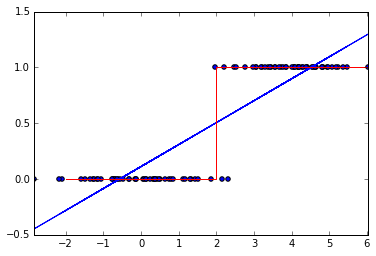

In [32]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(x.reshape(100,1),y)
plt.scatter(x, y)
plt.plot(x,clf.predict(x.reshape(100,1)))


plt.step([-2,2,7] , [0, 0, 1], c='r')
plt.xlim((min(x),max(x)))
plt.ylim((-0.5, 1.5))

These values go from negative to positive infinity. More sensative to extreme values.

## Logistic Function

We want to try to model something like the probablity. Let's try to find the probability P(Y=1|x). We model this with the sigmoid function. 

$\frac{e^{\beta_0 + \beta_1 x}}{1+e^{\beta_0 + \beta_1 x}}$

This always has a value between 0 and 1. One term shifts the curve and the other changes the slope.

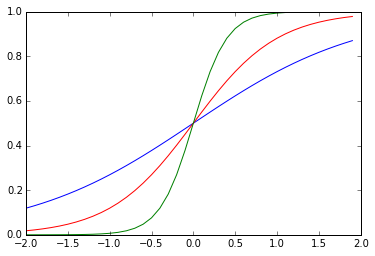

In [33]:
plt.plot(np.arange(-2,2,.1),1.0/(1+np.exp(-np.arange(-2,2,.1))), c='b')
plt.plot(np.arange(-2,2,.1),1.0/(1+np.exp(-2*np.arange(-2,2,.1))), c='r')
plt.plot(np.arange(-2,2,.1),1.0/(1+np.exp(-5*np.arange(-2,2,.1))),c='g')

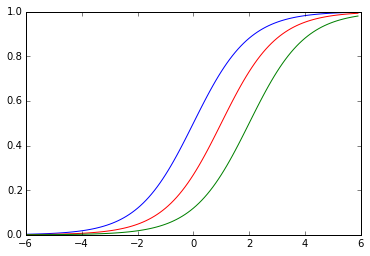

In [34]:
plt.plot(np.arange(-6,6,.1),1.0/(1+np.exp(-np.arange(-6,6,.1))), c='b')
plt.plot(np.arange(-6,6,.1),1.0/(1+np.exp(-np.arange(-6,6,.1)+1)), c='r')
plt.plot(np.arange(-6,6,.1),1.0/(1+np.exp(-np.arange(-6,6,.1)+2)),c='g')

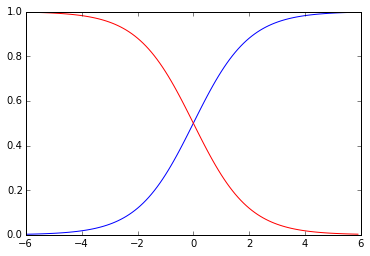

In [35]:
plt.plot(np.arange(-6,6,.1),1.0/(1+np.exp(-np.arange(-6,6,.1))), c='b')
plt.plot(np.arange(-6,6,.1),1.0/(1+np.exp(np.arange(-6,6,.1))), c='r')

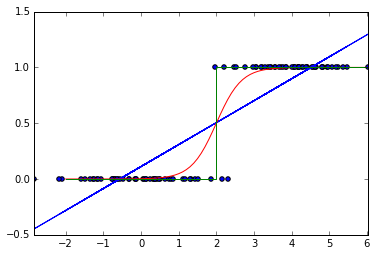

In [36]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(x.reshape(100,1),y)
plt.scatter(x, y)
plt.plot(x,clf.predict(x.reshape(100,1)))
plt.plot(np.arange(-2,7,.1),1.0/(1+np.exp(3*(-np.arange(-2,7,.1)+2))), c='r')
plt.xlim((min(x),max(x)))
plt.ylim((-0.5, 1.5))

plt.step([-2,2,7] , [0, 0, 1], c='g')

## How to interpret results

$z = \beta_0 + \beta_1 x$

$p(x) = \frac{e^{z}}{1+e^{z}}$

$\pi = p(y=1|x)$

$odds = \frac{\pi}{1-\pi}$


If I'm flipping a coin and the probability of heads is 0.33333 what is the probability of tails?

What is the odds?

How do I interpret this?


$log odds = log(\frac{\pi}{1-\pi}) = log(\frac{\frac{e^{z}}{1+e^{z}}}{(1- \frac{e^{z}}{1+e^{z}})}) = log(e^{z}) = z = \beta_0 + \beta_1 x$

We see that $\beta_1$ is the change in log-odds per one unit change in x. Thus,

$e^{\beta_1}$ gives us the change in odds for a unit change in x.

## Doing it in SKLearn

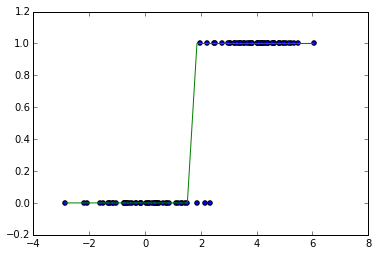

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x.reshape(100,1),y)

plt.scatter(x, y)
plt.plot(np.sort(x),logreg.predict(np.sort(x).reshape(100,1)), c='g')


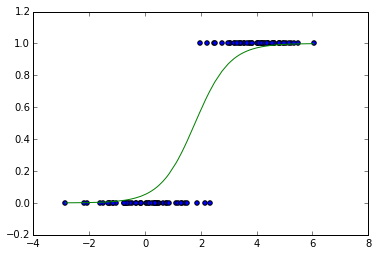

In [38]:
pred_prob = logreg.predict_proba(np.sort(x).reshape(100,1))
plt.scatter(x, y)
plt.plot(np.sort(x),pred_prob[:,1], c='g')

## What's going on

In [39]:
x1 = np.random.uniform(0,1,50)
x2 = np.random.uniform(0,1,50)

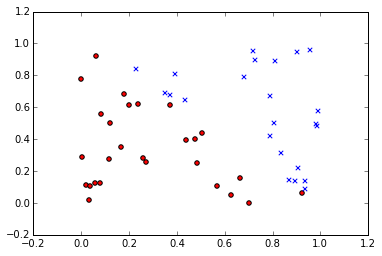

In [40]:
y = np.where(x1+x2 > 1, 1, 0)
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
for t, marker, c in zip(xrange(2), "ox", "rb"):
    plt.scatter(df[df['y'] == t]['x1'],df[df['y'] == t]['x2'], marker = marker, c=c)

In [41]:
logreg = LogisticRegression()
logreg.fit(df[['x1','x2']],df['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

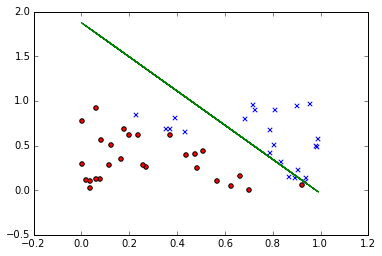

In [42]:
plt.plot(x1,(.5-logreg.intercept_-logreg.coef_[0][0]*x1)/logreg.coef_[0][1], c='g')
for t, marker, c in zip(xrange(2), "ox", "rb"):
    plt.scatter(df[df['y'] == t]['x1'],df[df['y'] == t]['x2'], marker = marker, c=c)

## Polynomial

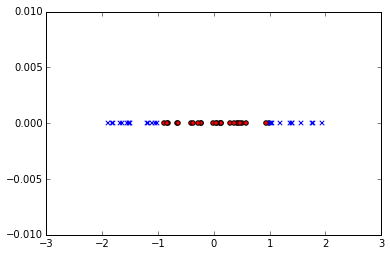

In [17]:
x = np.random.uniform(-2,2,50)
y  = np.where(np.abs(x) > 1, 1, 0)
df = pd.DataFrame({'x':x, 'y':y})
for t, marker, c in zip(xrange(2), "ox", "rb"):
    plt.scatter(df[df['y'] == t]['x'],np.zeros(len(df[df['y'] == t]['x'])), marker = marker, c=c)

In [18]:
logreg = LogisticRegression()
logreg.fit(df[['x']].values,df['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [19]:
print(logreg.intercept_)
print(logreg.coef_[0])

[-0.01496274]
[-0.16028369]


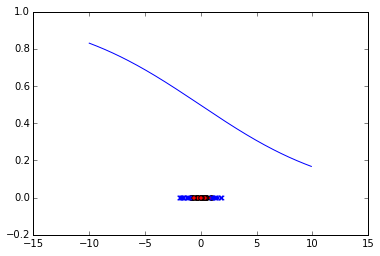

In [20]:
plt.plot(np.arange(-10,10,.1),1.0/(1+np.exp(-(logreg.intercept_+logreg.coef_[0]*np.arange(-10,10,.1)))), c='b')
for t, marker, c in zip(xrange(2), "ox", "rb"):
    plt.scatter(df[df['y'] == t]['x'],np.zeros(len(df[df['y'] == t]['x'])), marker = marker, c=c)

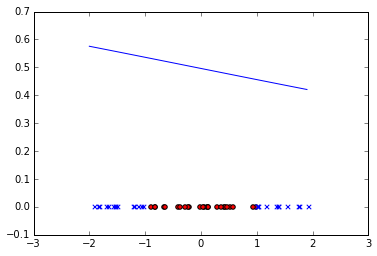

In [21]:
plt.plot(np.arange(-2,2,.1),1.0/(1+np.exp(-(logreg.intercept_+logreg.coef_[0]*np.arange(-2,2,.1)))), c='b')
for t, marker, c in zip(xrange(2), "ox", "rb"):
    plt.scatter(df[df['y'] == t]['x'],np.zeros(len(df[df['y'] == t]['x'])), marker = marker, c=c)

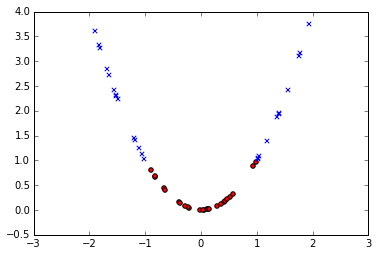

In [22]:
df['x2'] = df['x']**2
for t, marker, c in zip(xrange(2), "ox", "rb"):
    plt.scatter(df[df['y'] == t]['x'],df[df['y'] == t]['x2'], marker = marker, c=c)

In [23]:
logreg = LogisticRegression()
logreg.fit(df[['x','x2']].values,df['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [24]:
logreg.coef_

array([[-0.0025622 ,  2.23077646]])

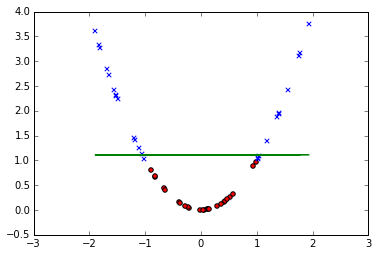

In [25]:
plt.plot(x, (.5-logreg.intercept_-logreg.coef_[0][0]*x)/logreg.coef_[0][1], c='g')
for t, marker, c in zip(xrange(2), "ox", "rb"):
    plt.scatter(df[df['y'] == t]['x'],df[df['y'] == t]['x2'], marker = marker, c=c)

# Multiclass problem

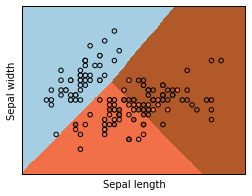

In [26]:
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)



# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Lab

Fit a Logistic Regression Model on the titanic data set

In [ ]:
dataframe.dropna()